In [1]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/data
list_files = []

/content/gdrive/MyDrive/data


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install -q kaggle

In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:35px;font-style: italic;color:  #6468e8">Basic Questions</li>
</ul>

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">City</span> in US has reported most no. of Accident Cases in last 5 years (2016-2020) ?</li>
    <li>Which are the <span style="color:#122ecc;">top 10 accident prone streets</span> in US ?</li>
    <li>Per Day <span style="color:#122ecc;">averagely how many road accidents</span> took placed in US ?</li>
    <li>In which <span style="color:#122ecc;">hours</span> of the <span style="color:#122ecc;">day most accidents</span> happened in US ?</li>
    <li>How are the basic <span style="color:#122ecc;">weather conditions</span> in <span style="color:#122ecc;">most</span> of the <span style="color:#122ecc;">accident cases</span> in US ?</li>  
    <li>Which are the <span style="color:#122ecc;">top 10 States</span> with <span style="color:#122ecc;">most no. of road accident cases</span> in US ?</li> 

</ul>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:Microsoft JhengHei UI Light;font-size:20px;color: #6468e8">...and More</li>
</ul>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:Microsoft JhengHei UI Light;font-size:20px;color: #6468e8">To See all the <b>imported libraries</b>, Click On Show <b>hidden code</b></li>
</ul>

In [12]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
import os
import descartes
import geopandas
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [13]:
%cd /content/gdrive/MyDrive/data
list_files = []
for file in os.listdir():
  if file.endswith('.csv'): 
    df = pd.read_csv(file) 
# read & load the dataset into pandas dataframe


/content/gdrive/MyDrive/data


In [14]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


In [15]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [16]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [17]:
top_10_cities = pd.DataFrame(city_df.head(10))

TypeError: ignored

findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Microsoft JhengHei UI Light'] not found. Falling back to DejaVu Sans.


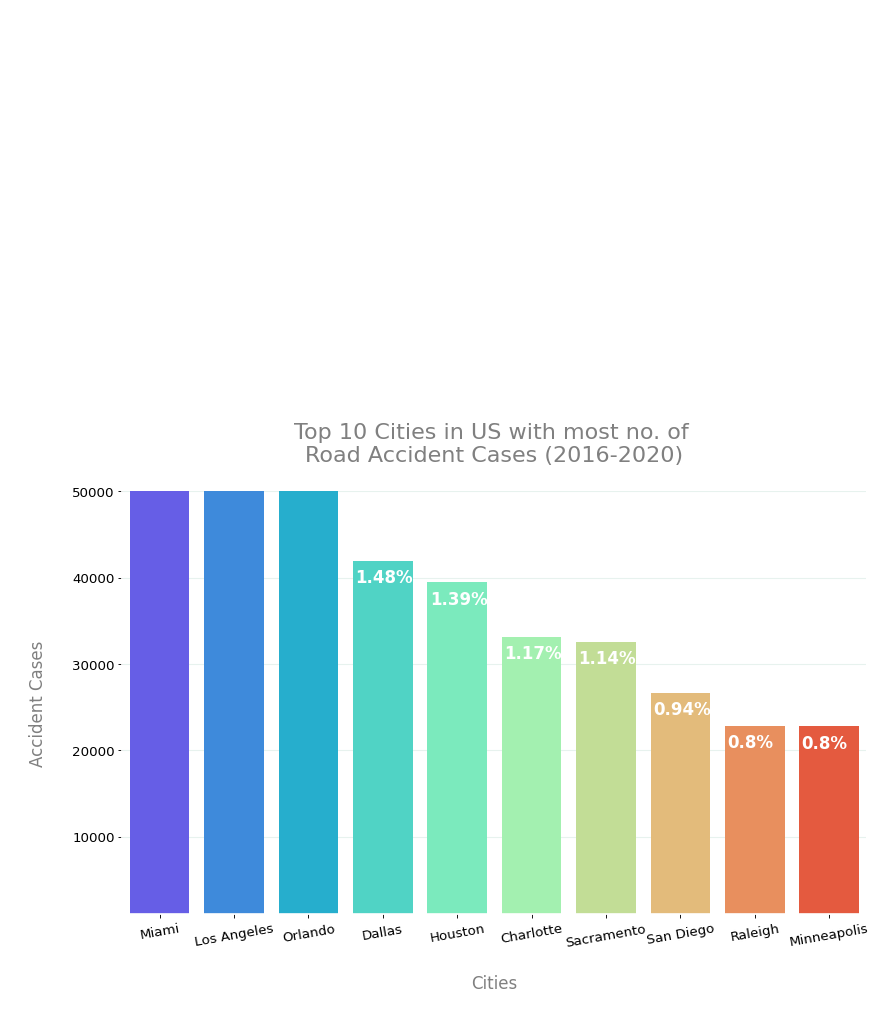

In [18]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2020)\n', size=20, color='grey')

plt.rcParams['font.family'] = "DejaVu Sans"
plt.rcParams['font.serif'] = ["DejaVu Sans"]

plt.ylim(1000, 50000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>1. <span style="font-weight: bold; color:#122ecc;">Los Angeles</span> is the city with <span style="font-weight: bold; color:#122ecc;">highest (2.64%)</span> no. of road accidents in US (2016-2020).</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;">Miami</span> is the city with <span style="font-weight: bold; color:#122ecc;">2nd highest (2.39%)</span> no. of road accidents in US (2016-2020).</li>
    <br>
    <li>3. Around <span style="font-weight: bold; color:#122ecc;">14%</span> accident records of past 5 years are only from these <span style="font-weight: bold; color:#122ecc;">10 cities</span> out of 10,657 cities in US (as per the dataset).</li>

</ul>
</div>

In [ ]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/5))
print(round(hightest_cases/(5*365)))

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>4. In past 5 years (2016-2020) <span style="font-weight: bold; color:#122ecc;">yearly 7,997 road accidents</span> (average) happened in <span style="font-weight: bold; color:#122ecc;">Los Angeles</span>.</li>
<br>
<li>5. In <span style="font-weight: bold; color:#122ecc;">Los Angeles</span> averagely in <span style="font-weight: bold; color:#122ecc;">every 12 hours 11 accidents</span> occurred.</li>
</ul>
</div>

In [ ]:
states = geopandas.read_file('us-states-map.zip')

def lat(city):
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    return (location.latitude)

def lng(city):
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    return (location.longitude)

# list of top 10 cities
top_ten_city_list = list(city_df.City.head(10))

top_ten_city_lat_dict = {}
top_ten_city_lng_dict = {}
for i in top_ten_city_list:
    top_ten_city_lat_dict[i] = lat(i)
    top_ten_city_lng_dict[i] = lng(i)
    
top_10_cities_df = df[df['City'].isin(list(top_10_cities.City))]

top_10_cities_df['New_Start_Lat'] = top_10_cities_df['City'].map(top_ten_city_lat_dict)
top_10_cities_df['New_Start_Lng'] = top_10_cities_df['City'].map(top_ten_city_lng_dict)

In [ ]:
geometry_cities = [Point(xy) for xy in zip(top_10_cities_df['New_Start_Lng'], top_10_cities_df['New_Start_Lat'])]
geo_df_cities = geopandas.GeoDataFrame(top_10_cities_df, geometry=geometry_cities)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='grey');

colors = ['#e6194B','#f58231','#ffe119','#bfef45','#3cb44b', '#aaffc3','#42d4f4','#4363d8','#911eb4','#f032e6']
markersizes = [50+(i*20) for i in range(10)][::-1]
for i in range(10):
    geo_df_cities[geo_df_cities['City'] == top_ten_city_list[i]].plot(ax=ax, markersize=markersizes[i], 
                                                                      color=colors[i], marker='o', 
                                                                      label=top_ten_city_list[i], alpha=0.7);
    
plt.legend(prop={'size': 13}, loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), edgecolor='white', title="Cities", title_fontsize=15);

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone Cities in US (2016-2020)', size=20, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>6. <span style="font-weight: bold; color:#122ecc;">3 out of top 10 cities</span> with most no. of accident cases is from the state, <span style="font-weight: bold; color:#122ecc;">California</span>.</li>
    
</ul>
</div>

In [ ]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>


<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black"> 
<li>In this Dataset, we have the records of total <span style="color:#122ecc;">10,657 Cities</span>.</li> 
<br>
<li>7. <span style="font-weight: bold; color:#122ecc;">11% (1167 Cities)</span> cities in US, have <span style="font-weight: bold; color:#122ecc;">only 1</span> accident record in past 5 years.</li> 
<br>
<li>8. Around <span style="font-weight: bold; color:#122ecc;">81% (8,682 Cities)</span> of all cities in US, have <span style="font-weight: bold; color:#122ecc;">less than 100</span> total no. of road accidents.</li>
<br>
<li>9. <span style="font-weight: bold; color:#122ecc;">97.64% (10,406 Cities)</span> cities in US, have the road accident records (2016-2020), <span style="font-weight: bold; color:#122ecc;">less than 1,000</span>.</li>
<br>
<li>10. There are <span style="font-weight: bold; color:#122ecc;">251 Cities (2.36%)</span> in US, which have <span style="font-weight: bold; color:#122ecc;">more than 1,000</span> total no. of road accidents in past 5 years.</li>
<br>
<li>11. <span style="font-weight: bold; color:#122ecc;">40 Cities (0.38%)</span> in US, have <span style="font-weight: bold; color:#122ecc;">more than 5,000</span> road accident records.</li>
<br>
<li>12. Only <span style="font-weight: bold; color:#122ecc;">13 Cities (0.12%)</span> in US, have <span style="font-weight: bold; color:#122ecc;">more than 10,000</span> road accident records.</li>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1sJtIStrGS6tRxrEq0Q-9Q2_oc8HgHRim" align="left" hspace="10px" vspace="27px" width="75" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">State Analysis</li>
</ul>

In [ ]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 600000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>13. In US, <span style="font-weight: bold; color:#122ecc">California</span> is the state with <span style="font-weight: bold; color:#122ecc">highest no. of road accidents </span> in past 5 years.</li>
<br>
<li>14. About <span style="font-weight: bold; color:#122ecc">30%</span> of the total accident records of past 5 years in US is only from <span style="font-weight: bold; color:#122ecc">California</span>.</li>
<br>
<li>15. In past 5 years, averagely <span style="font-weight: bold; color:#122ecc">246 accidents (daily)</span> happened  in <span style="font-weight: bold; color:#122ecc">California </span> implies approximately <span style="font-weight: bold; color:#122ecc">10 accidents per hour</span>.</li>
<br>
<li>16. <span style="font-weight: bold; color:#122ecc">Florida</span> is the <span style="font-weight: bold; color:#122ecc">2nd highest (10% cases)</span> state for no. road accidents in US.</li> 
</ul>
</div>

In [ ]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
geo_df = geopandas.GeoDataFrame(df, geometry=geometry)

geo_df['year'] = geo_df.Start_Time.dt.year

geo_df['State'] = geo_df['State'].apply(convert)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])

states.boundary.plot(ax=ax, color='grey');
states.apply(lambda x: None if (x.NAME not in top_ten_states_name) else ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color='black', weight='bold', fontsize=12.5), axis=1);

# CFOTNYMVNPI
colors = ['#FF5252','#9575CD','#FF8A80','#FF4081','#FFEE58','#7C4DFF','#00E5FF','#81D4FA','#64FFDA','#8C9EFF']
count = 0
for i in list(state_df['State'].head(10)):
    geo_df[geo_df['State'] == i].plot(ax=ax, markersize=1, color=colors[count], marker='o');
    count += 1

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone States in US (2016-2020)', size=20, color='grey');

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('cool', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].tail(10), x=state_df['State'].tail(10), palette='cool')
ax1 = ax.twinx()
sns.lineplot(data = state_df[-10:], marker='o', x='State', y='Cases', color = 'white', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.1, i.get_height()+100, \
            '  {:,d}\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=15,
                color='black')

ax.set(ylim =(-50, 5000))
ax1.set(ylim =(-50, 6000))

plt.title('\nTop 10 States with least no. of \nAccident cases in US (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    side1 = ax1.spines[i]
    side1.set_visible(False)
    
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 5000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 5000)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=11, rotation=15)

MI = mpatches.Patch(color=clrs[-1], label='State with Minimum\n no. of Road Accidents')
ax.legend(handles=[MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-1], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>17. <span style="font-weight: bold; color:#122ecc">South Dakota</span> is the city with <span style="font-weight: bold; color:#122ecc">lowest no. of road accidents </span> in past 5 years.</li>
<br>
<li>18. Only <span style="font-weight: bold; color:#122ecc">213</span> accidents took place in <span style="font-weight: bold; color:#122ecc">South Dakota </span> in past 5 years implies <span style="font-weight: bold; color:#122ecc">yearly 42 cases</span> in average.</li>  
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1SMd1X0DQJ28Jvw8m5lGFolffRLvT_RPk" align="left" hspace="15px" vspace="23px" width="65" height="70" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Timezone Analysis</li>
</ul>

In [ ]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

In [ ]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)

cmap = cm.get_cmap('spring', 4)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='spring')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()-50000, \
            '{}%'.format(round(i.get_height()*100/total)), fontsize=15,weight='bold',
                color='white')
    

plt.ylim(-20000, 700000)
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nTimezones\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
ax.spines['bottom'].set_bounds(0.005, 3)
ax.spines['left'].set_bounds(0, 700000)

MA = mpatches.Patch(color=clrs[0], label='Timezone with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Timezone with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>19. <span style="font-weight: bold; color:#122ecc">Eastern</span> time zone region of US has the <span style="font-weight: bold; color:#122ecc">highest no. of road accident cases (39%)</span> in past 5 years.</li>
<br>
<li>20. <span style="font-weight: bold; color:#122ecc">Mountain</span> time zone region of US has the <span style="font-weight: bold; color:#122ecc">lowest no. of road accident cases (6%)</span> in past 5 years.</li>
</ul>
</div>

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='black');

colors = ['#00db49', '#ff5e29', '#88ff33', '#fffb29']
#4132
count = 0
for i in list(timezone_df.Timezone):
    geo_df[geo_df['Timezone'] == i].plot(ax=ax, markersize=1, color=colors[count], marker='o', label=i);
    count += 1

plt.legend(markerscale=10., prop={'size': 15}, edgecolor='white', title="Timezones", title_fontsize=15, loc='lower right');

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Road Accidents \nfor different Timezones in US (2016-2020)', size=20, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1Q86nyt6kw2QItXOeQooc9eUWJJSfns7x" align="left" hspace="20px" vspace="23px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Street Analysis</li>
</ul>

In [ ]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [ ]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'white', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='white')
    
ax.axes.set_ylim(-1000, 30000)
ax1.axes.set_ylim(-1000, 40000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2020)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)

    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 30000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 30000)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>21. In last 5 years (2016-2020) <span style="font-weight: bold; color:#122ecc">Street No. I-5 N</span> is having the <span style="font-weight: bold; color:#122ecc">highest road accidents records</span>.</li>
<br>
<li>22. In <span style="font-weight: bold; color:#122ecc">Street No. I-5 N</span>, daily <span style="font-weight: bold; color:#122ecc">14 accidents</span> occurred in average.</li>
</ul>
</div>

In [ ]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">    
<li>In Our dataset, there are <span style="color:#122ecc;">total 93,048 Streets</span> enlisted for accidental cases,</li>
<br>
<li>23. There are <span style="font-weight: bold; color:#122ecc">36,441 Streets (39%)</span> in US which have <span style="font-weight: bold; color:#122ecc">only 1 accident </span> record in past 5 years.</li>
<br>
<li>24. <span style="font-weight: bold; color:#122ecc">98% Streets</span> of US, have <span style="font-weight: bold; color:#122ecc">less than 100</span> road accident cases.</li>
<br>
<li>25. Only <span style="font-weight: bold; color:#122ecc">0.2% Streets</span> in US have the accident cases <span style="font-weight: bold; color:#122ecc">greater than 1000</span>.</li>
<br>
<li>26. In last 5 years record of road accidents, only <span style="font-weight: bold; color:#122ecc">24 Streets (0.03%)</span> have <span style="font-weight: bold; color:#122ecc">greater than 5000</span> cases.</li>   
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1S8LdQuNiA350_8L4jg0hPgzy277ujPvY" align="left" hspace="15px" vspace="23px" width="75" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Severity Analysis</li>
</ul>

<p style="font-size:20px;">
It Shows the severity of the accident, a number between 1 and 4, where <span style="color:#122ecc;">1</span> indicates the <span style="color:#122ecc;">least impact on traffic (i.e., short delay as a result of the accident)</span> and <span style="color:#122ecc;">4 indicates a significant impact on traffic (i.e., long delay)</span>. Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.
</p>

In [ ]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [ ]:
fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.Cases,
    title = {"position": "top center", 
             "text": "<b>Impact on the Traffic due to the Accidents</b>", 
             'font':dict(size=18,color="#7f7f7f")},
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">    
<li>27. In <span style="font-weight: bold;color:#122ecc;">80% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">Moderate (Severity-2)</span>.</li>
<br>
<li>28. In <span style="font-weight: bold;color:#122ecc;">7.5% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">highly Severe (Severity-4)</span>.</li>
</ul>
</div>

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='black');

geo_df[geo_df['Severity'] == 1].plot(ax=ax, markersize=50, color='#5cff4a', marker='o', label='Severity 1');
geo_df[geo_df['Severity'] == 3].plot(ax=ax, markersize=10, color='#ff1c1c', marker='x', label='Severity 3');
geo_df[geo_df['Severity'] == 4].plot(ax=ax, markersize=1, color='#6459ff', marker='v', label='Severity 4');
geo_df[geo_df['Severity'] == 2].plot(ax=ax, markersize=5, color='#ffb340', marker='+', label='Severity 2');

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nDifferent level of Severity visualization in US map', size=20, color='grey');

One = mpatches.Patch(color='#5cff4a', label='Severity 1')
Two = mpatches.Patch(color='#ffb340', label='Severity 2')
Three = mpatches.Patch(color='#ff1c1c', label='Severity 3')
Four = mpatches.Patch(color='#6459ff', label='Severity 4')

ax.legend(handles=[One, Two, Three, Four], prop={'size': 15}, loc='lower right', borderpad=1, 
          labelcolor=['#5cff4a', '#ffb340', '#ff1c1c', '#6459ff'], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=16WjYIfoUzn4uY2PeItGTOlfZODUwzmMZ" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Time Analysis</li>
</ul>

<p style="font-size:20px;">
In this dataset we have <span style="color:#122ecc;">Start_Time & End_Time</span> for the timings of each accident.
<span style="color:#122ecc;">Start_Time</span> shows start time of the accident in <span style="color:#122ecc;">local time zone</span>.
End_Time shows end time of the accident in local time zone. <span style="color:#122ecc;">End time</span> here refers to when the impact of accident on <span style="color:#122ecc;">traffic flow</span>.
</p>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1VKyR9PPYM2FhvWyy1BwYCmxWKGWfU4nW" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Accident Duration Analysis</li>
</ul>

In [ ]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [ ]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

cmap = cm.get_cmap('bwr', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')
ax1 = ax.twinx()
sns.lineplot(data = top_10_accident_duration_df, marker='o', x='Duration', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

ax.set(ylim =(1000, 400000))
ax1.set(ylim =(1000, 500000))

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)
ax.tick_params(axis='both', which='major', labelsize=12)
MA = mpatches.Patch(color=clrs[-3], label='Duration with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-3], facecolor='#e6f2ed', edgecolor='#e6f2ed');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">   
<li>29. From the above plot, it is inferred that <span style="font-weight: bold;color:#122ecc">majority (24.25%)</span> of road accidents, have impacted on the traffic flow for <span style="font-weight: bold;color:#122ecc;">6 hours</span>.</li>   
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1KLPBME8hlKLSmdJx9XHXpJYEYdR1Huj3" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Year Analysis</li>
</ul>

In [ ]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=year_df['Cases'], x=year_df['Year'], palette=['#9a90e8', '#5d82de', '#3ee6e0', '#40ff53','#2ee88e'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-50000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(10000, 900000)
plt.title('\nRoad Accident Percentage \nover past 5 Years in US (2016-2020)\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nYears\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    

for k in ['top', 'right', "bottom", 'left']:
        side = ax.spines[k]
        side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=0.3)
MA = mpatches.Patch(color='#2ee88e', label='Year with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#9a90e8', label='Year with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=['#2ee88e', '#9a90e8'], edgecolor='white');
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>30. From the above figure, it is clear that in <span style="font-weight: bold; color:#122ecc">last 5 years (2016-2020)</span> in US <span style="font-weight: bold; color:#122ecc">accidents percentage</span> has <span style="font-weight: bold;color:#122ecc">increased significantly</span>.</li>
<br>
<li>31. <span style="font-weight: bold; color:#122ecc">70%</span> of the total road accident records of last 5 years happened only within <span style="font-weight: bold; color:#122ecc">last 2 years (2019, 2020)</span>.</li>
</ul>
</div>

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Accident Cases over the past 5 years in US', fontsize=20,fontweight ="bold", color='grey')
count = 0
years = ['2016', '2017', '2018', '2019', '2020']
colors = ['#77fa5a', '#ffff4d', '#ffab36', '#ff894a', '#ff513b']
for i in [ax1, ax2, ax3, ax4, ax5]:
    i.set_xlim([-125,-65])
    i.set_ylim([22,55])
    states.boundary.plot(ax=i, color='black');
    geo_df[geo_df['year']==int(years[count])].plot(ax=i, markersize=1, color=colors[count], marker='+', alpha=0.5)
    for j in ['bottom', 'top', 'left', 'right']:
        side = i.spines[j]
        side.set_visible(False)
    i.set_title(years[count] + '\n({:,} Road Accident Cases)'.format(list(year_df.Cases)[count]), fontsize=12, color='grey', weight='bold')
    i.axis('off')
    count += 1
    
sns.lineplot(data = year_df, marker='o', x='Year', y='Cases', color = '#734dff', ax=ax6, label="Yearly Road Accidents");

for k in ['bottom', 'top', 'left', 'right']:
        side = ax6.spines[k]
        side.set_visible(False)
ax6.xaxis.set_ticks(year_df.Year);
ax6.legend(prop={'size': 12}, loc='best', edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1c2FCGk18oh6GbaTXAkYtvGsIC8rmsNXy" align="left" hspace="15px" vspace="20px" width="75" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Year Analysis based on Severity</li>
</ul>

In [ ]:
accident_severity_df = geo_df.groupby(['year', 'Severity']).size().unstack()

In [ ]:
ax = accident_severity_df.plot(kind='barh', stacked=True, figsize=(12, 6), 
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

ax.set_title('\nSeverity and Corresponding Accident \nPercentage for past 5 years in US\n', fontsize=20, color='grey');

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.spines['bottom'].set_bounds(0, 800000);
ax.set_ylabel('\nYears\n', fontsize=15, color='grey');
ax.set_xlabel('\nAccident Cases\n', fontsize=15, color='grey');
ax.legend(prop={'size': 12.5}, loc='best', fancybox = True, title="Severity", title_fontsize=15, edgecolor='white');
ax.tick_params(axis='both', which='major', labelsize=12.5)
#ax.set_facecolor('#e6f2ed')
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    var = width*100/df.shape[0]
    if var > 0:
        if var > 4:
            ax.text(x+width/2, 
                        y+height/2-0.05, 
                        '{:.2f}%'.format(width*100/df.shape[0]),
                        fontsize=12,  color='black', alpha= 0.8)
        elif var > 1.8 and var < 3.5:
            ax.text(x+width/2-17000, 
                        y+height/2-0.05, 
                        '{:.2f}%'.format(width*100/df.shape[0]),
                        fontsize=12,  color='black', alpha= 0.8)      
        elif var>1.5 and var<1.8:
            ax.text(x+width/2+7000, 
                    y+height/2-0.05, 
                    '  {:.2f}%'.format(width*100/df.shape[0]),
                    fontsize=12,  color='black', alpha= 0.8)
        elif var>1:
            ax.text(x+width/2-20000, 
                    y+height/2-0.05, 
                    '  {:.2f}%'.format(width*100/df.shape[0]),
                    fontsize=12,  color='black', alpha= 0.8)
        else:
            ax.text(x+width/2+10000, 
                    y+height/2-0.05, 
                    '  {:.2f}%'.format(width*100/df.shape[0]),
                    fontsize=12,  color='black', alpha= 0.8)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>32. In <span style="font-weight: bold; color:#122ecc">last 4 years (2017-2020)</span>  <span style="font-weight: bold; color:#122ecc">highly severe (Severity-4)</span> accident cases in us remain in the range of <span style="font-weight: bold;color:#122ecc">1.55% to 1.8%</span>.</li>
<br>
<li>33. <span style="font-weight: bold; color:#122ecc">45%</span> of the total road accidents of last 5 years which occurred only in <span style="font-weight: bold; color:#122ecc">2020</span> are <span style="font-weight: bold; color:#122ecc">moderately severe (Severity-2)</span>.</li>
</ul>
</div>

In [ ]:
year_df['accident/day'] = round(year_df['Cases']/(5*365))
year_df['accident/hour'] = round(year_df['Cases']/(5*365*24))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12.5,6), dpi = 80)

count = 0
plots = ['accident/day', 'accident/hour']
plots_limit = [(-10, 500), (-0.5, 22.5)]
plots_bound = [(0, 500), (0, 20)]
plot_text = [60, 2.5]

colors = [['#ffb74b', '#ffd6a4', '#ceb1f2', '#a071ff', '#6f71f7'], 
          ['#cd7cf2', '#f27ec8', '#fa70b3', '#ff5e86', '#ff1732']]

for i in [ax1, ax2]:

    sns.barplot(ax=i, y=year_df[plots[count]], x=year_df['Year'], palette=colors[count])
    
    var = plots[count].split('/')[-1].capitalize()
    
    for j in i.patches:
        i.text(j.get_x()+0.06, j.get_height()-plot_text[count], \
                str(int(j.get_height()))+'\nAccidents\nPer {}'.format(var), fontsize=8.5, color='white', weight='bold')

    i.axes.set_ylim(plots_limit[count])
    i.axes.set_ylabel('\nAccident Cases\n', fontsize=12, color='grey')
    i.axes.set_xlabel('\nYears\n', fontsize=12, color='grey')
    i.tick_params(axis='both', which='major', labelsize=10)

    i.set_title('\nAverage Cases \nof Accident/{} in US (2016-2020)\n'.format(var), fontsize =15, color='grey')
    i.spines['bottom'].set_bounds(0.005, 4)
    i.spines['left'].set_bounds(plots_bound[count])

    for k in ['top', 'right']:
            side = i.spines[k]
            side.set_visible(False)

    i.set_axisbelow(True)
    MA = mpatches.Patch(color=colors[count][-1], label='Year with Maximum\n no. of Road Accidents')
    MI = mpatches.Patch(color=colors[count][0], label='Year with Minimum\n no. of Road Accidents')
    i.legend(handles=[MA, MI], prop={'size': 10}, loc='best', borderpad=1, 
          labelcolor=[colors[count][-1], colors[count][0]], edgecolor='white');
    count += 1

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>34. In the year <span style="font-weight: bold; color:#122ecc">2020</span>, averagely <span style="font-weight: bold; color:#122ecc">432 accidents</span> happened <span style="font-weight: bold; color:#122ecc">per day</span> in US.</li>
<br>
<li>35. From <span style="font-weight: bold; color:#122ecc">2019</span> to <span style="font-weight: bold; color:#122ecc">2020</span> the <span style="font-weight: bold; color:#122ecc">average accident/day</span> has <span style="font-weight: bold; color:#122ecc">increased 3 times</span> in US.</li>
<br>
<li>36. Compare to <span style="font-weight: bold; color:#122ecc">2016</span> the <span style="font-weight: bold; color:#122ecc">accident/hour</span> has <span style="font-weight: bold; color:#122ecc">increased 6 times</span> in <span style="font-weight: bold; color:#122ecc">2020</span>.<li>
<br>
<li>37. In the year <span style="font-weight: bold; color:#122ecc">2020</span>, averagely <span style="font-weight: bold; color:#122ecc">18 accidents</span> happened <span style="font-weight: bold; color:#122ecc">per hour</span> in US implies that <span style="font-weight: bold; color:#122ecc">3 accidents in every 10 minutes</span>.</li>    
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1wDgnslui9hD7EtyE3lJAKQHoJ2xkn0Gr" align="left" hspace="20px" vspace="25px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Month Analysis</li>
</ul>

In [ ]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='plasma')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-17000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='white', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different months in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nMonths\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 300000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 300000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Month with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Month with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">   
<li>38. Around <span style="font-weight: bold; color:#122ecc">18%</span> of the road accidents occurred in the month of <span style="font-weight: bold; color:#122ecc">December</span>.</li>
<br>
<li>39. <span style="font-weight: bold; color:#122ecc">July</span> is month with <span style="font-weight: bold; color:#122ecc">least (3.54%)</span> no. of road accidents in US.</li>
<br>
<li>40. <span style="font-weight: bold; color:#122ecc">45%</span> of the road accidents occurred only within the <span style="font-weight: bold; color:#122ecc">3 months, October to December</span> <span style="font-weight: bold; color:#122ecc">(i.e., transition period from Autumn to Winter)</span>.</li> 
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1-HtYX31dHesDTI-EUn6c1RZOXRnttGJj" align="left" hspace="20px" vspace="23px" width="45" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Day Analysis</li>
</ul>

In [ ]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='white')

plt.ylim(-10000, 300000)
plt.title('\nRoad Accident Percentage \nfor different days over the week\n', size=20, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xlabel('\nDay of the Week\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 300000)

MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>41. <span style="font-weight: bold; color:#122ecc">Working Days</span> of the week have almost <span style="font-weight: bold; color:#122ecc">2 times higher</span> accident percentage, compared with the <span style="font-weight: bold; color:#122ecc">Weekend Days</span> which is as our expectation.</li>
<br>
<li>42. Only around <span style="font-weight: bold; color:#122ecc">17%</span> road accident records occurred in <span style="font-weight: bold; color:#122ecc">weekend</span>.</li>
<br>
<li>43. <span style="font-weight: bold; color:#122ecc">Thursday</span> of a week is having the <span style="font-weight: bold; color:#122ecc">highest</span> percentage of road accidents.</li>
<br>
<li>44. On <span style="font-weight: bold; color:#122ecc">Sunday</span> the percentage of road accidents in US is <span style="font-weight: bold; color:#122ecc">lowest</span>.</li>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1_p2o0LqHvjWOA3L79S74VGaekbXVI0Ym" align="left" hspace="20px" vspace="25px" width="45" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Hour Analysis</li>
</ul>

In [ ]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">  
<li>45. Around <span style="font-weight: bold; color:#122ecc">18%</span> of the road accidents occurred in between <span style="font-weight: bold; color:#122ecc">6:00AM</span> to <span style="font-weight: bold; color:#122ecc">9:00AM</span>.</li>
<br>
<li>46. In evening, around <span style="font-weight: bold; color:#122ecc">27%</span> of the road accidents occurred in between <span style="font-weight: bold; color:#122ecc">3:00PM</span> to <span style="font-weight: bold; color:#122ecc">6:00PM</span>.</li>
<br>
<li>47. The <span style="font-weight: bold; color:#122ecc">most-deadliest accident hour</span> is <span style="font-weight: bold; color:#122ecc">5:00PM</span> implies the <span style="font-weight: bold; color:#122ecc">Evening Office-Returning Hours</span>.</li>
<br>
<li>48. The <span style="font-weight: bold; color:#122ecc">2nd most-deadliest accident hour</span> is <span style="font-weight: bold; color:#122ecc">8:00AM</span> implies the <span style="font-weight: bold; color:#122ecc">Morning Office-Going Hours</span>.</li>   
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1PKxlMSZjyJcv1X8PIJ8CLUQb9nl_gxdH" align="left" hspace="5px" vspace="7px" width="70" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Road Condition Analysis</li>
</ul>

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1
        
   

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>49. Almost in every case (99.98%) <span style="font-weight: bold; color:#122ecc">Bumper was absent</span> in the accident spot.</li>
<br>
<li>50. In <span style="font-weight: bold; color:#122ecc">5.7%</span> cases, road accidents happened <span style="font-weight: bold; color:#122ecc">near the crossing</span>.</li>
<br>
<li>51. In <span style="font-weight: bold; color:#122ecc">98.83%</span> cases, there were <span style="font-weight: bold; color:#122ecc">no Stop</span> near the accident area.</li>
<br>
<li>52. <span style="font-weight: bold; color:#122ecc">13.49%</span> road accident cases recorded <span style="font-weight: bold; color:#122ecc">near the junctions</span>.</li>
<br>
<li>53. There are no accident cases recorded near the <span style="font-weight: bold; color:#122ecc">Turning Loop</span>.</li>
<br>
<li>54. <span style="font-weight: bold; color:#122ecc">11.21%</span> road accident cases recorded <span style="font-weight: bold; color:#122ecc">near the traffic signal</span>.</li>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1lPC6VjDxg32gFO0xiglDRA1K_nrdeSTZ" align="left" hspace="15px" vspace="20px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">Weather Analysis</li>
</ul>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:Microsoft JhengHei UI Light;font-size:20px;color: #6468e8">We've created a custom function. To See the Code, Click On Show <b>hidden code</b></li>
</ul>

In [ ]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):
        
        lower_limit = int(var_min+((i-1)*gap))
        
        if i==split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))
            
        #intervals
        intervals.append(upper_limit)
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [ ]:
def Feature_Bin_Plot(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    
    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)
    
#     clrs = ['mediumspringgreen' if (x < max(temp_df['Cases'])) else 'grey' for x in temp_df['Cases']]
    cmap = cm.get_cmap(clrs, len(intervals))   
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    
    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs);
    
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
        
    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpatches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
              labelcolor=[clrs[max_index]], edgecolor='white');

In [19]:
temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 30)

Feature_Bin_Plot(df, 'Temperature(F)', 'gist_ncar',temp_intervals, temp_labels, 
                 (12, 6), 14, (-20000, 800000), [0.01, 10000], '\nPercentage of different Temperature range\n')

NameError: ignored


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>55. In the <span style="font-weight: bold; color:#122ecc">temperature</span> range of <span style="font-weight: bold; color:#122ecc">61(F) - 91(F)</span>, <span style="font-weight: bold; color:#122ecc">45%</span> of the road accidents occurred.</li>
</ul>
</div>

In [20]:
Humidity_intervals, Humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)

Feature_Bin_Plot(df, 'Humidity(%)', 'magma', Humidity_intervals, Humidity_labels, 
                 (12, 6), 14, (-20000, 500000), [0.01, 10000], '\nPercentage of different Humidity range\n')

NameError: ignored

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>56. In <span style="font-weight: bold; color:#122ecc">maximum cases (15.74%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">humidity</span> range is between <span style="font-weight: bold; color:#122ecc">81% - 91%</span>.</li>   
</ul>
</div>

In [ ]:
Pressure_intervals, Pressure_labels = generate_intervals_labels('Pressure(in)', 6, 10)

Feature_Bin_Plot(df, 'Pressure(in)', 'Paired', Pressure_intervals, Pressure_labels, 
                 (12, 6), 14, (-20000, 1500000), [0.01, 10000], '\nPercentage of different Pressure range\n')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>57. In <span style="font-weight: bold; color:#122ecc">67.32%</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">air pressure</span> range is between <span style="font-weight: bold; color:#122ecc">20(in) - 30(in)</span>.</li>  
</ul>
</div>

In [ ]:
Wind_Chill_intervals, Wind_Chill_labels = generate_intervals_labels('Wind_Chill(F)', 10, 20)

Feature_Bin_Plot(df, 'Wind_Chill(F)', 'inferno', Wind_Chill_intervals, Wind_Chill_labels, 
                 (12, 6), 14, (-20000, 700000), [0.01, 10000], '\nPercentage of different Wind Chill range\n')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>58. In <span style="font-weight: bold; color:#122ecc">most</span> of the <span style="font-weight: bold; color:#122ecc">cases (26.37%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">wind chill</span> range is between <span style="font-weight: bold; color:#122ecc">51(F) - 71(F)</span>.</li>
</ul>
</div>

In [ ]:
Wind_Speed_intervals, Wind_Speed_labels = generate_intervals_labels('Wind_Speed(mph)', 10, 5)

Feature_Bin_Plot(df, 'Wind_Speed(mph)', 'turbo',Wind_Speed_intervals, Wind_Speed_labels, 
                 (12, 6), 14, (-20000, 900000), [0.01, 10000], '\nPercentage of different Wind Speed range\n')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>59. For around <span style="font-weight: bold; color:#122ecc">35%</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">wind speed</span> range is between <span style="font-weight: bold; color:#122ecc">5(mph) - 10(mph)</span>.</li> 
</ul>
</div>

In [ ]:
Visibility_intervals, Visibility_labels = generate_intervals_labels('Visibility(mi)', 12, 1)

Feature_Bin_Plot(df, 'Visibility(mi)', 'prism', Visibility_intervals, Visibility_labels, 
                 (12, 6), 14, (-20000, 1900000), [0.01, 30000], '\nPercentage of different Visibility range\n')

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>60. In <span style="font-weight: bold; color:#122ecc">maximum cases (77.71%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">Visibility range is between 9(mi) - 10(mi)</span>.</li>
</ul>
</div>

In [ ]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('rainbow_r', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette='rainbow_r')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+40000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2020)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 600000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Weather_Condition with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0]], edgecolor='white');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">Insight:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">  
<li>61. In <span style="font-weight: bold; color:#122ecc">most</span> of the <span style="font-weight: bold; color:#122ecc">cases (30.69%)</span> the <span style="font-weight: bold; color:#122ecc">weather</span> was <span style="font-weight: bold; color:#122ecc">Fair</span> and approximately in <span style="font-weight: bold; color:#122ecc">13% cases</span> it was <span style="font-weight: bold; color:#122ecc">mostly cloudy</span>.</li>
</ul>
</div>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">All Insights</li>
</ul>

<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
<li>1. <span style="font-weight: bold; color:#122ecc;">Los Angeles</span> is the city with <span style="font-weight: bold; color:#122ecc;">highest (2.64%)</span> no. of road accidents in US (2016-2020).</li>
<br>
<li>2. <span style="font-weight: bold; color:#122ecc;">Miami</span> is the city with <span style="font-weight: bold; color:#122ecc;">2nd highest (2.39%)</span> no. of road accidents in US (2016-2020).</li>
<br>
<li>3. Around <span style="font-weight: bold; color:#122ecc;">14%</span> accident records of past 5 years are only from these <span style="font-weight: bold; color:#122ecc;">10 cities</span> out of 10,657 cities in US (as per the dataset).</li>  

---

<li>4. In past 5 years (2016-2020) <span style="font-weight: bold; color:#122ecc;">yearly 7,997 road accidents</span> (average) happened in <span style="font-weight: bold; color:#122ecc;">Los Angeles</span>.</li>
<br>
<li>5. In <span style="font-weight: bold; color:#122ecc;">Los Angeles</span> averagely in <span style="font-weight: bold; color:#122ecc;">every 12 hours 11 accidents</span> occurred.</li>

---

<li>6. <span style="font-weight: bold; color:#122ecc;">3 out of top 10 cities</span> with most no. of accident cases is from the state, <span style="font-weight: bold; color:#122ecc;">California</span>.</li>   

---
  
<li>In this Dataset, we have the records of total <span style="color:#122ecc;">10,657 Cities</span>.</li> 

<li>7. <span style="font-weight: bold; color:#122ecc;">11% (1167 Cities)</span> cities in US, have <span style="font-weight: bold; color:#122ecc;">only 1</span> accident record in past 5 years.</li> 
<br>
<li>8. Around <span style="font-weight: bold; color:#122ecc;">81% (8,682 Cities)</span> of all cities in US, have <span style="font-weight: bold; color:#122ecc;">less than 100</span> total no. of road accidents.</li>
<br>
<li>9. <span style="font-weight: bold; color:#122ecc;">97.64% (10,406 Cities)</span> cities in US, have the road accident records (2016-2020), <span style="font-weight: bold; color:#122ecc;">less than 1,000</span>.</li>
<br>
<li>10. There are <span style="font-weight: bold; color:#122ecc;">251 Cities (2.36%)</span> in US, which have <span style="font-weight: bold; color:#122ecc;">more than 1,000</span> total no. of road accidents in past 5 years.</li>
<br>
<li>11. <span style="font-weight: bold; color:#122ecc;">40 Cities (0.38%)</span> in US, have <span style="font-weight: bold; color:#122ecc;">more than 5,000</span> road accident records.</li>
<br>
<li>12. Only <span style="font-weight: bold; color:#122ecc;">13 Cities (0.12%)</span> in US, have <span style="font-weight: bold; color:#122ecc;">more than 10,000</span> road accident records.</li>

---

<li>13. In US, <span style="font-weight: bold; color:#122ecc">California</span> is the state with <span style="font-weight: bold; color:#122ecc">highest no. of road accidents </span> in past 5 years.</li>
<br>
<li>14. About <span style="font-weight: bold; color:#122ecc">30%</span> of the total accident records of past 5 years in US is only from <span style="font-weight: bold; color:#122ecc">California</span>.</li>
<br>
<li>15. In past 5 years, averagely <span style="font-weight: bold; color:#122ecc">246 accidents (daily)</span> happened  in <span style="font-weight: bold; color:#122ecc">California </span> implies approximately <span style="font-weight: bold; color:#122ecc">10 accidents per hour</span>.</li>
<br>
<li>16. <span style="font-weight: bold; color:#122ecc">Florida</span> is the <span style="font-weight: bold; color:#122ecc">2nd highest (10% cases)</span> state for no. road accidents in US.</li>   

---
    
<li>17. <span style="font-weight: bold; color:#122ecc">South Dakota</span> is the city with <span style="font-weight: bold; color:#122ecc">lowest no. of road accidents </span> in past 5 years.</li>
<br>
<li>18. Only <span style="font-weight: bold; color:#122ecc">213</span> accidents took place in <span style="font-weight: bold; color:#122ecc">South Dakota </span> in past 5 years implies <span style="font-weight: bold; color:#122ecc">yearly 42 cases</span> in average.</li>   

---
  
<li>19. <span style="font-weight: bold; color:#122ecc">Eastern</span> time zone region of US has the <span style="font-weight: bold; color:#122ecc">highest no. of road accident cases (39%)</span> in past 5 years.</li>
<br>
<li>
20. <span style="font-weight: bold; color:#122ecc">Mountain</span> time zone region of US has the <span style="font-weight: bold; color:#122ecc">lowest no. of road accident cases (6%)</span> in past 5 years.</li>

---
   
<li>21. In last 5 years (2016-2020) <span style="font-weight: bold; color:#122ecc">Street No. I-5 N</span> is having the <span style="font-weight: bold; color:#122ecc">highest road accidents records</span>.</li>
<br>
<li>22. In <span style="font-weight: bold; color:#122ecc">Street No. I-5 N</span>, daily <span style="font-weight: bold; color:#122ecc">14 accidents</span> occurred in average.</li>

---

<li>In Our dataset, there are <span style="color:#122ecc;">total 93,048 Streets</span> enlisted for accidental cases,</li>
<br>
<li>23. There are <span style="font-weight: bold; color:#122ecc">36,441 Streets (39%)</span> in US which have <span style="font-weight: bold; color:#122ecc">only 1 accident </span> record in past 5 years.</li>
<br>
<li>24. <span style="font-weight: bold; color:#122ecc">98% Streets</span> of US, have <span style="font-weight: bold; color:#122ecc">less than 100</span> road accident cases.</li>
<br>
<li>25. Only <span style="font-weight: bold; color:#122ecc">0.2% Streets</span> in US have the accident cases <span style="font-weight: bold; color:#122ecc">greater than 1000</span>.</li>
<br>
<li>26. In last 5 years record of road accidents, only <span style="font-weight: bold; color:#122ecc">24 Streets (0.03%)</span> have <span style="font-weight: bold; color:#122ecc">greater than 5000</span> cases.</li>

---

<li>27. In <span style="font-weight: bold;color:#122ecc;">80% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">Moderate (Severity-2)</span>.</li>
<br>
<li>28. In <span style="font-weight: bold;color:#122ecc;">7.5% Cases</span> of road accidents, the impact on the traffic was <span style="font-weight: bold;color:#122ecc;">highly Severe (Severity-4)</span>.</li>

---
    
<li>29. From the above plot, it is inferred that <span style="font-weight: bold;color:#122ecc">majority (24.25%)</span> of road accidents, have impacted on the traffic flow for <span style="font-weight: bold;color:#122ecc;">6 hours</span>.</li>    

---

<li>30. From the above figure, it is clear that in <span style="font-weight: bold; color:#122ecc">last 5 years (2016-2020)</span> in US <span style="font-weight: bold; color:#122ecc">accidents percentage</span> has <span style="font-weight: bold;color:#122ecc">increased significantly</span>.</li>
<br>
<li>31. <span style="font-weight: bold; color:#122ecc">70%</span> of the total road accident records of last 5 years happened only within <span style="font-weight: bold; color:#122ecc">last 2 years (2019, 2020)</span>.</li>

---

<li>32. In <span style="font-weight: bold; color:#122ecc">last 4 years (2017-2020)</span>  <span style="font-weight: bold; color:#122ecc">highly severe (Severity-4)</span> accident cases in us remain in the range of <span style="font-weight: bold;color:#122ecc">1.55% to 1.8%</span>.</li>
<br>
<li>33. <span style="font-weight: bold; color:#122ecc">45%</span> of the total road accidents of last 5 years which occurred only in <span style="font-weight: bold; color:#122ecc">2020</span> are <span style="font-weight: bold; color:#122ecc">moderately severe (Severity-2)</span>.</li>

---

<li>34. In the year <span style="font-weight: bold; color:#122ecc">2020</span>, averagely <span style="font-weight: bold; color:#122ecc">432 accidents</span> happened <span style="font-weight: bold; color:#122ecc">per day</span> in US.</li>
<br>
<li>35. From <span style="font-weight: bold; color:#122ecc">2019</span> to <span style="font-weight: bold; color:#122ecc">2020</span> the <span style="font-weight: bold; color:#122ecc">average accident/day</span> has <span style="font-weight: bold; color:#122ecc">increased 3 times</span> in US.</li>
<br>
<li>36. Compare to <span style="font-weight: bold; color:#122ecc">2016</span> the <span style="font-weight: bold; color:#122ecc">accident/hour</span> has <span style="font-weight: bold; color:#122ecc">increased 6 times</span> in <span style="font-weight: bold; color:#122ecc">2020</span>.</li>
<br>
<li>37. In the year <span style="font-weight: bold; color:#122ecc">2020</span>, averagely <span style="font-weight: bold; color:#122ecc">18 accidents</span> happened <span style="font-weight: bold; color:#122ecc">per hour</span> in US implies that <span style="font-weight: bold; color:#122ecc">3 accidents in every 10 minutes</span>.
</li>

---

<li>38. Around <span style="font-weight: bold; color:#122ecc">18%</span> of the road accidents occurred in the month of <span style="font-weight: bold; color:#122ecc">December</span>.</li>
<br>
<li>39. <span style="font-weight: bold; color:#122ecc">July</span> is month with <span style="font-weight: bold; color:#122ecc">least (3.54%)</span> no. of road accidents in US.</li>
<br>
<li>40. <span style="font-weight: bold; color:#122ecc">45%</span> of the road accidents occurred only within the <span style="font-weight: bold; color:#122ecc">3 months, October to December</span> <span style="font-weight: bold; color:#122ecc">(i.e., transition period from Autumn to Winter)</span>.</li>    

---
    
<li>41. <span style="font-weight: bold; color:#122ecc">Working Days</span> of the week have almost <span style="font-weight: bold; color:#122ecc">2 times higher</span> accident percentage, compared with the <span style="font-weight: bold; color:#122ecc">Weekend Days</span> which is as our expectation.</li>
<br>
<li>42. Only around <span style="font-weight: bold; color:#122ecc">17%</span> road accident records occurred in <span style="font-weight: bold; color:#122ecc">weekend</span>.</li>
<br>
<li>43. <span style="font-weight: bold; color:#122ecc">Thursday</span> of a week is having the <span style="font-weight: bold; color:#122ecc">highest</span> percentage of road accidents.</li>
<br>
<li>44. On <span style="font-weight: bold; color:#122ecc">Sunday</span> the percentage of road accidents in US is <span style="font-weight: bold; color:#122ecc">lowest</span>.</li>

---

<li>45. Around <span style="font-weight: bold; color:#122ecc">18%</span> of the road accidents occurred in between <span style="font-weight: bold; color:#122ecc">6:00AM</span> to <span style="font-weight: bold; color:#122ecc">9:00AM</span>.</li>
<br>
<li>46. In evening, around <span style="font-weight: bold; color:#122ecc">27%</span> of the road accidents occurred in between <span style="font-weight: bold; color:#122ecc">3:00PM</span> to <span style="font-weight: bold; color:#122ecc">6:00PM</span>.</li>
<br>
<li>47. The <span style="font-weight: bold; color:#122ecc">most-deadliest accident hour</span> is <span style="font-weight: bold; color:#122ecc">5:00PM</span> implies the <span style="font-weight: bold; color:#122ecc">Evening Office-Returning Hours</span>.</li>
<br>
<li>48. The <span style="font-weight: bold; color:#122ecc">2nd most-deadliest accident hour</span> is <span style="font-weight: bold; color:#122ecc">8:00AM</span> implies the <span style="font-weight: bold; color:#122ecc">Morning Office-Going Hours</span>.</li>

---

<li>49. Almost in every case (99.98%) <span style="font-weight: bold; color:#122ecc">Bumper was absent</span> in the accident spot.</li>
<br>
<li>50. In <span style="font-weight: bold; color:#122ecc">5.7%</span> cases, road accidents happened <span style="font-weight: bold; color:#122ecc">near the crossing</span>.</li>
<br>
<li>51. In <span style="font-weight: bold; color:#122ecc">98.83%</span> cases, there were <span style="font-weight: bold; color:#122ecc">no Stop</span> near the accident area.</li>
<br>
<li>52. <span style="font-weight: bold; color:#122ecc">13.49%</span> road accident cases recorded <span style="font-weight: bold; color:#122ecc">near the junctions</span>.</li>
<br>
<li>53. There are no accident cases recorded near the <span style="font-weight: bold; color:#122ecc">Turning Loop</span>.</li>
<br>
<li>54. <span style="font-weight: bold; color:#122ecc">11.21%</span> road accident cases recorded <span style="font-weight: bold; color:#122ecc">near the traffic signal</span>.</li>

---

<li>55. In the <span style="font-weight: bold; color:#122ecc">temperature</span> range of <span style="font-weight: bold; color:#122ecc">61(F) - 91(F)</span>, <span style="font-weight: bold; color:#122ecc">45%</span> of the road accidents occurred.</li>    

---

<li>56. In <span style="font-weight: bold; color:#122ecc">maximum cases (15.74%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">humidity</span> range is between <span style="font-weight: bold; color:#122ecc">81% - 91%</span>.</li>      

---

<li>57. In <span style="font-weight: bold; color:#122ecc">67.32%</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">air pressure</span> range is between <span style="font-weight: bold; color:#122ecc">20(in) - 30(in)</span>.</li>  

---

<li>58. In <span style="font-weight: bold; color:#122ecc">most</span> of the <span style="font-weight: bold; color:#122ecc">cases (26.37%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">wind chill</span> range is between <span style="font-weight: bold; color:#122ecc">51(F) - 71(F)</span>.</li>

---

<li>59. For around <span style="font-weight: bold; color:#122ecc">35%</span> of road accident cases, the <span style="font-weight: bold; color:#122ecc">wind speed</span> range is between <span style="font-weight: bold; color:#122ecc">5(mph) - 10(mph)</span>.</li>   

---

<li>60. In <span style="font-weight: bold; color:#122ecc">maximum cases (77.71%)</span> of road accident, the <span style="font-weight: bold; color:#122ecc">Visibility range is between 9(mi) - 10(mi)</span>.</li>

---

<li>61. In <span style="font-weight: bold; color:#122ecc">most</span> of the <span style="font-weight: bold; color:#122ecc">cases (30.69%)</span> the <span style="font-weight: bold; color:#122ecc">weather</span> was <span style="font-weight: bold; color:#122ecc">Fair</span> and approximately in <span style="font-weight: bold; color:#122ecc">13% cases</span> it was <span style="font-weight: bold; color:#122ecc">mostly cloudy</span>.</li>
    
</ul>

<center>
    <img src="https://media.istockphoto.com/vectors/car-drivers-in-accident-on-city-street-vector-id1267465436?k=20&m=1267465436&s=612x612&w=0&h=zun0mTHz2AqM8xTkt5QjtnvOMBLYKEefruZBICBNCIo=" />
</center>

<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:'Microsoft JhengHei UI Light';font-weight: bold;font-size:40px;color:  #6468e8">Thank You !!</li>
    <li style="font-family:'Microsoft JhengHei UI Light';font-weight: bold;font-size:35px;color:  #6468e8">If You love this Notebook, UpVote !!</li>
</ul>